<a href="https://colab.research.google.com/github/JuanCodeAtATime/Basic-Portfolio/blob/master/ds_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering Course End Project
By Juan Rivera


# 1) Import the necessary libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2) Read the dataset

In [ ]:
df = pd.read_csv('PEP1.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
# Print the name of the columns
print(df.columns)


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'Bedroom', 'Kitchen', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDe

In [ ]:
# Print the shape of the dataframe
print(df.shape)

(1460, 81)


In [ ]:
# Check for null values
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [ ]:
# Print the unique values
print(df.apply(pd.Series.nunique))
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column} column: {unique_values}")

In [ ]:
# Select the numerical and categorical variables
# numerical variables
numerical_vars = df.select_dtypes(include=['int64', 'float64'])

# categorical variables
categorical_vars = df.select_dtypes(include=['object'])

print("Numerical Variables:")
print(numerical_vars.head())

print("\nCategorical Variables:")
print(categorical_vars.head())

Numerical Variables:
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal

# 3) Descriptitve Stats and EDA

In [ ]:
# EDA of numerical values

Data Cleaning

In [ ]:
# Missing Value treatment
# missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_vals = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_vals.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [ ]:
# treating missing data
# remove columns that have a high number (over %15) of missing values as they are useless
# remove variables that have the same number of missing data as they are probably based...
# ...on the same observations and can skew the data (GarageCond, GarageType, GarageYrBlt, etc)
# Electrical has only one missing value so it is tolerable
df = df.drop((missing_vals[missing_vals['Total'] > 1]).index, axis=1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
#confirming there is no missing data
df.isnull().sum().max()

0

In [ ]:
df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [ ]:
# descriptive statistics summary
df['SalePrice'].describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Univariate Analysis

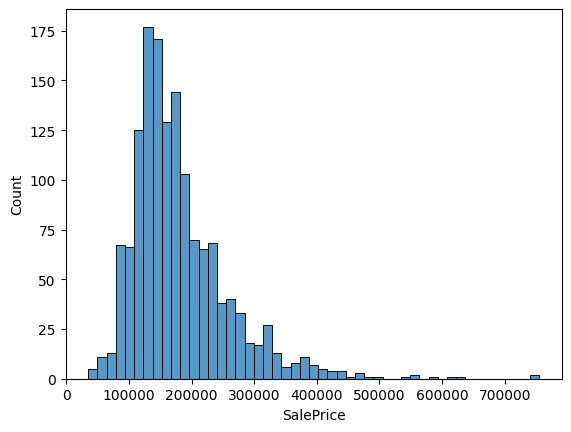

In [ ]:
# Univariate Analysis (UA) allows us to analyze data of just one variable (ie, feature or column)
# Identify the skewness and distribution
# histogram (below) of SalePrice because it is the ouput variable we need to predict
sns.histplot(df['SalePrice']);


In [ ]:
# skewness and kurtosis
# Notes: since it's skewed to the left, we want to identify the degree of skewness
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())


Skewness: 1.881943
Kurtosis: 6.529263


In [ ]:
# standardizing the data
# Notes: because of the shape and skewness, we have determined that there are many outliers,
# hence the need for standardizing the data
sale_price_2d = df['SalePrice'].values.reshape(-1, 1)

# standardize the 2D array
sp_standardized = StandardScaler().fit_transform(sale_price_2d)

# Sort the standardized values
sorted_values = sp_standardized[:, 0].argsort()

# Get the low and high ranges
low_range = sp_standardized[sorted_values][:10]
high_range = sp_standardized[sorted_values][-10:]

# Print the results
print('outer range (low) of distribution:')
print(low_range)
print('\nouter range (high) of distribution:')
print(high_range)


outer range (low) of distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


Bivariate Analysis

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

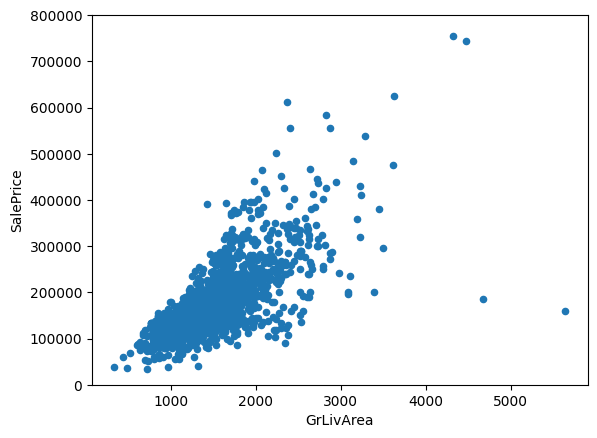

In [ ]:
#Using two variables to compare how one effects the other
#Notes: Scatter plots, box plots or correlation matrices can be used

#Example:  Show how 'SalesPrice' and 'LotArea' effect one another
gr_liv_area = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[gr_liv_area]], axis=1)
data.plot.scatter(x=gr_liv_area, y='SalePrice', ylim=(0,800000))

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

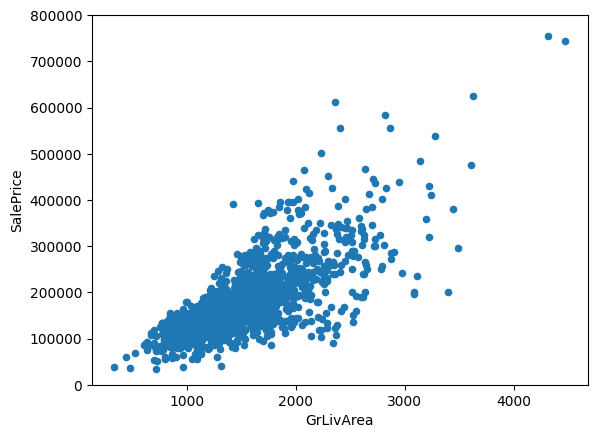

In [ ]:
#Deleting outliers
df.sort_values(by = gr_liv_area, ascending= False)[:2]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

#See Updated scatter plot after deleting two outliers
gr_liv_area = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[gr_liv_area]], axis=1)
data.plot.scatter(x=gr_liv_area, y='SalePrice', ylim=(0,800000))


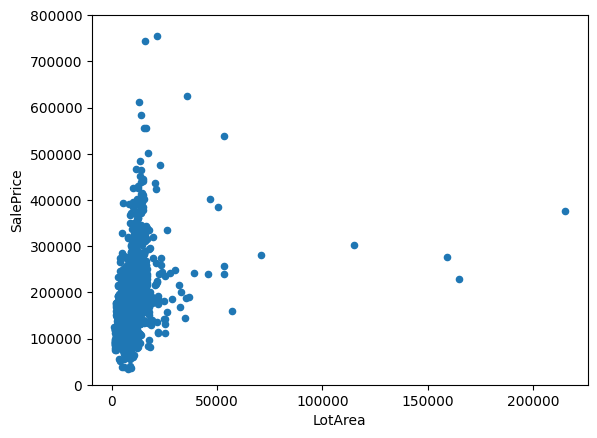

In [ ]:
#scatter plot LotArea with SalePrice
lot_area = 'LotArea'
data = pd.concat([df['SalePrice'], df[lot_area]], axis=1)
data.plot.scatter(x=lot_area, y='SalePrice', ylim=(0,800000));


(-0.5, 9.5, 0.0, 800000.0)

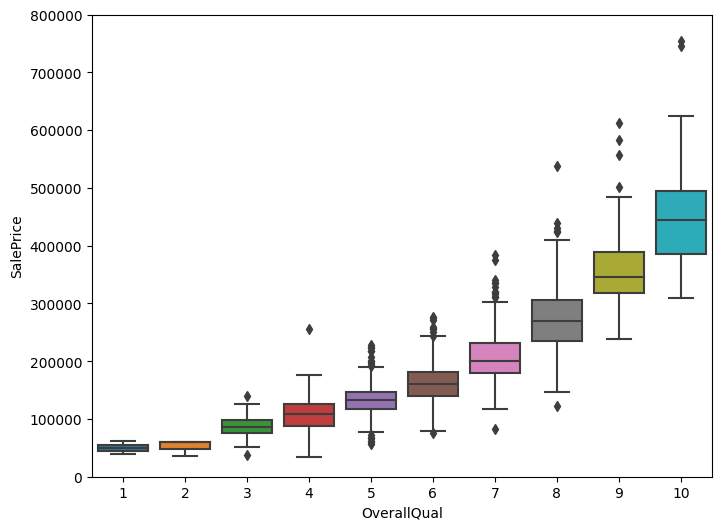

In [ ]:
#box plot OverallQual w/SalePrice (Categorical Values compared to Numerical Values)
# Set figure size
plt.rcParams['figure.figsize'] = (8,6)


over_all_q = 'OverallQual'
data = pd.concat([df['SalePrice'], df[over_all_q]], axis=1)

f, ax = plt.subplots()
fig = sns.boxplot(x=over_all_q, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

In [ ]:
#The above box plot shows how the two values are linearly correlated.  That is, as OverallQual increases, so does the SalePrice.

Multivariate Analysis

<Axes: >

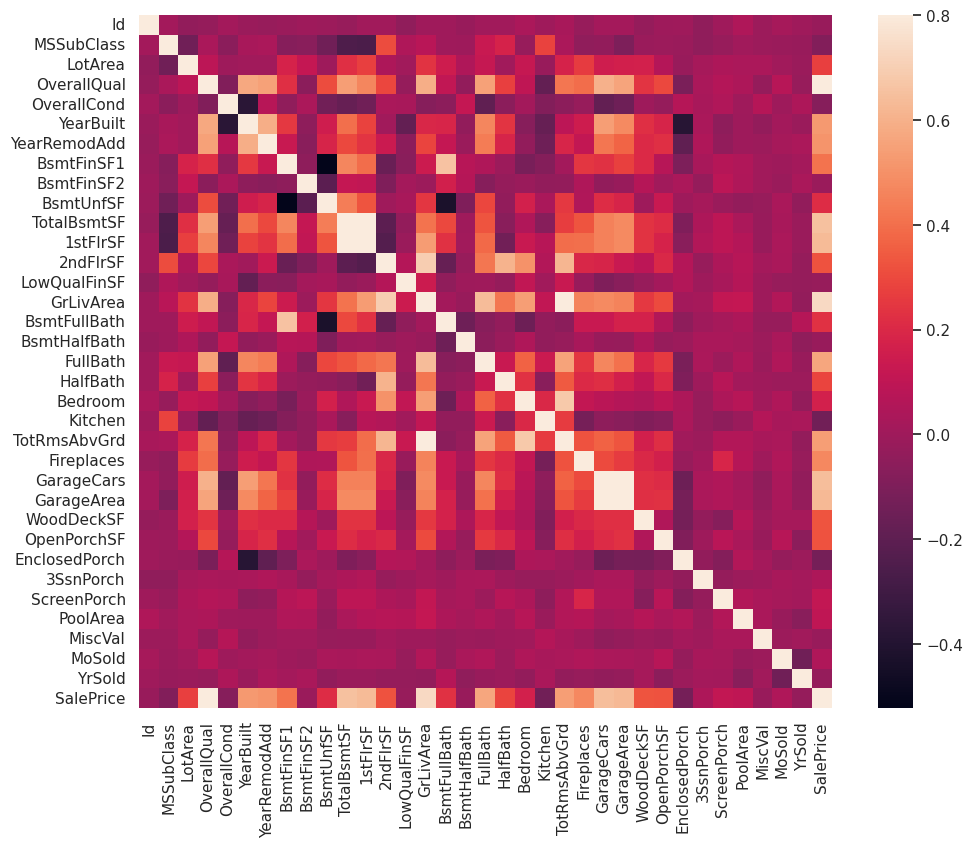

In [ ]:
#Correlation matrix (Heatmap)

plt.rcParams['figure.figsize'] = (12,9)
cor_matrix = df.corr(numeric_only=True)
f, ax = plt.subplots()
sns.heatmap(cor_matrix, vmax=.8, square=True)

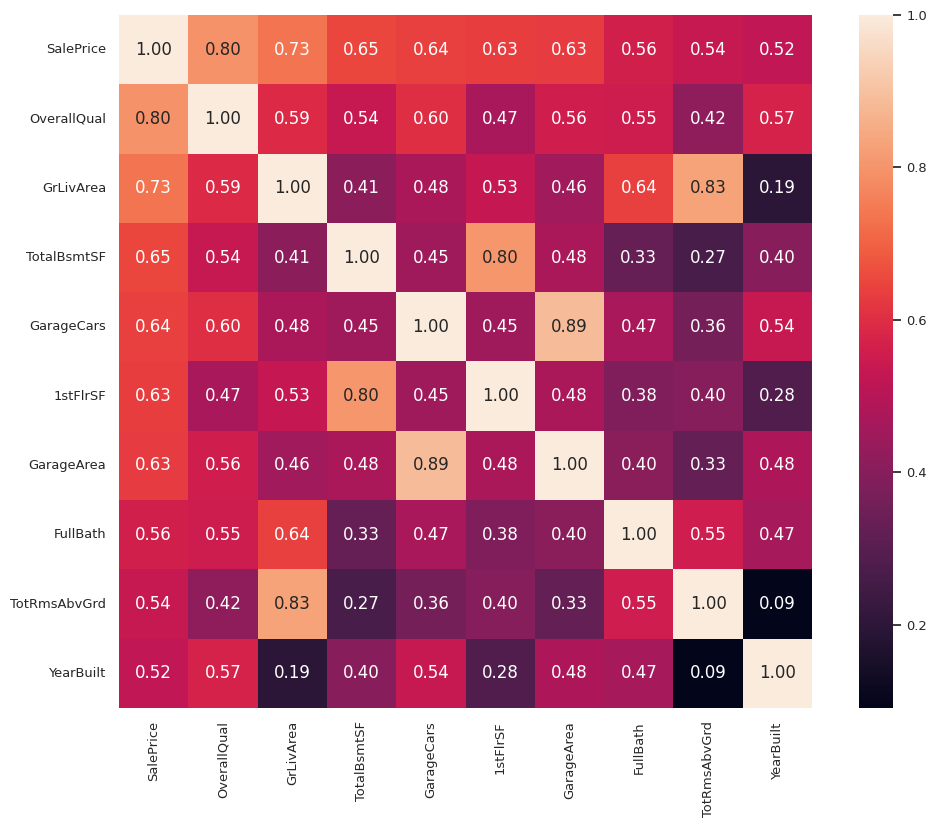

In [ ]:
#displaying SalesPrice correlation matrix to show the variables mostly correlated with SalesPrice
n = 10
cols = cor_matrix.nlargest(n, "SalePrice")['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=.85)
ht_map = sns.heatmap(cm, cbar=True,annot=True, square=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


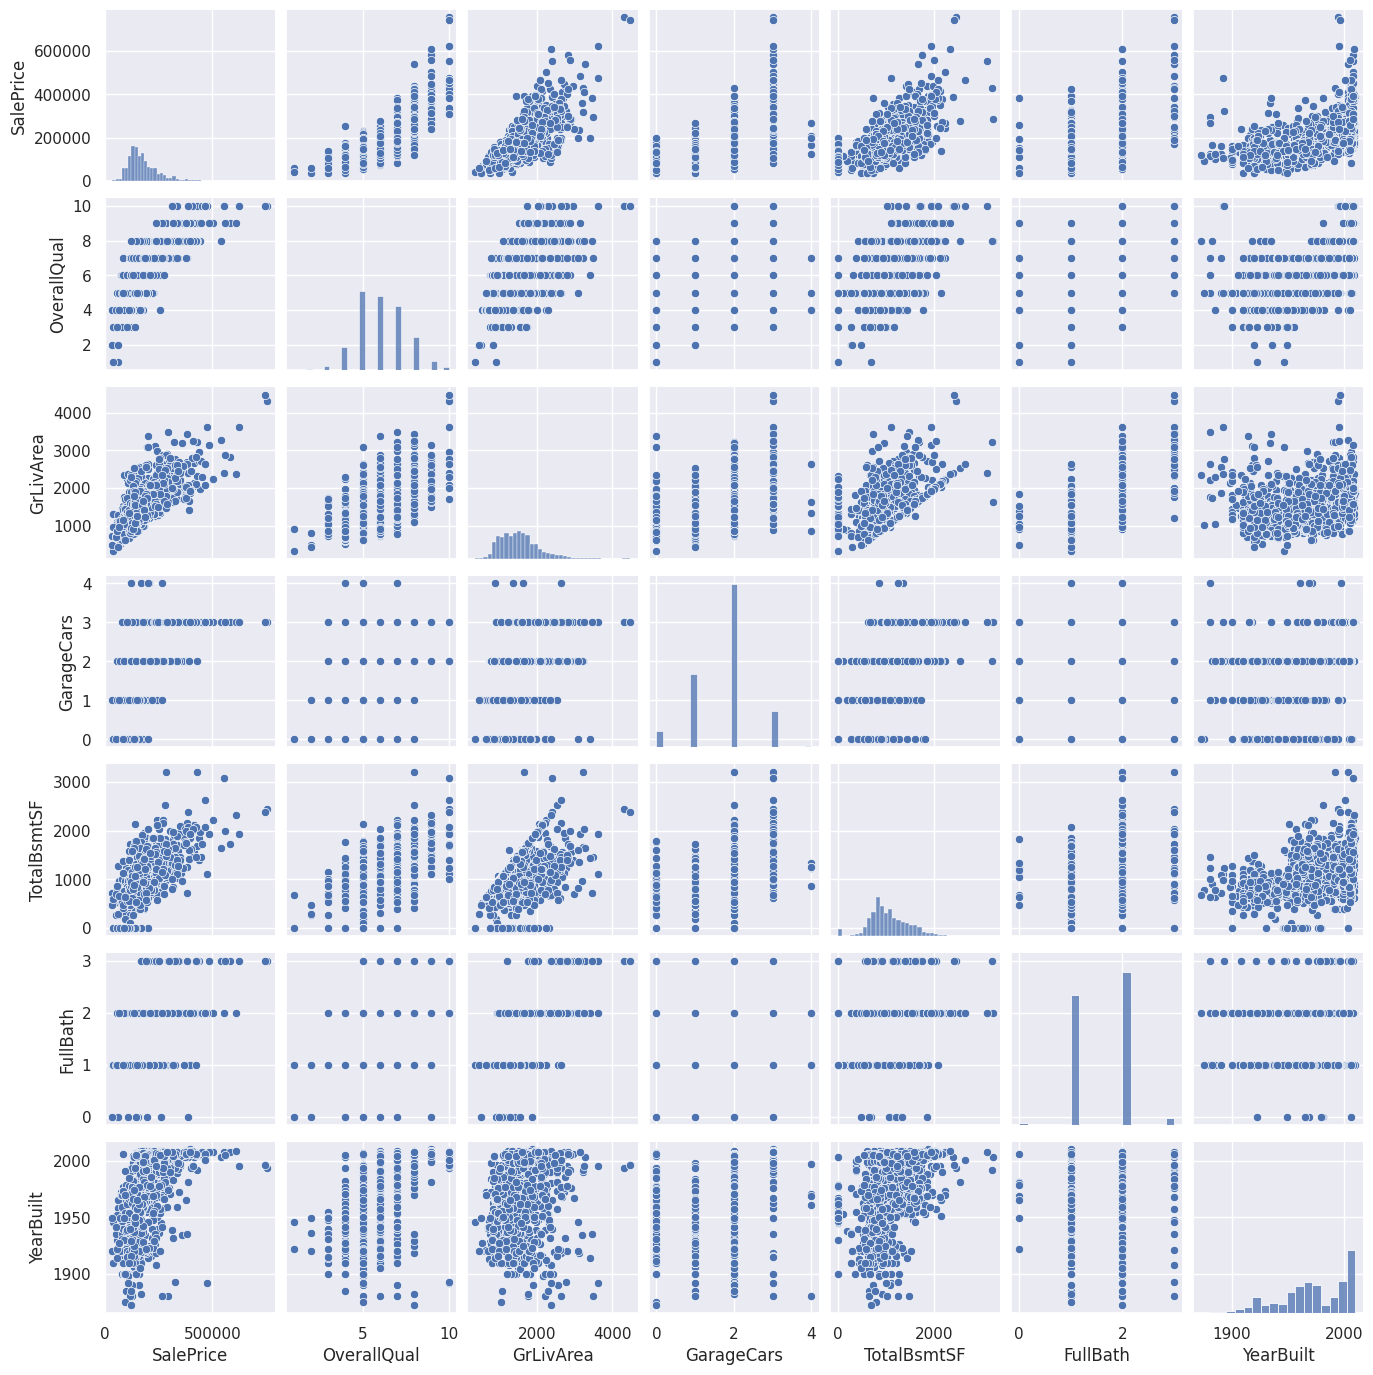

In [ ]:
#Scatterplot consiting of all the y-axis variables
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], height= 2)
plt.show();